In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns

Load data

In [10]:
labels = pd.read_csv("data/places365_val.txt", sep=" ", header=None)
categories = pd.read_csv("data/categories_places365.txt", sep=" ", header=None)
labels

,0,1
0,Places365_val_00000001.jpg,165
1,Places365_val_00000002.jpg,358
2,Places365_val_00000003.jpg,93
3,Places365_val_00000004.jpg,164
4,Places365_val_00000005.jpg,289
...,...,...
36495,Places365_val_00036496.jpg,156
36496,Places365_val_00036497.jpg,313
36497,Places365_val_00036498.jpg,336
36498,Places365_val_00036499.jpg,300


Extract data corresponding to our dataset

In [11]:
path = os.getcwd()
NOBW_paths = glob.glob(path + os.sep + "data" +os.sep+"val_256_NOBW"+os.sep+"*.jpg")
# NOBW_paths = glob.glob(path + os.sep + "data" +os.sep+"val_split"+os.sep+"*.jpg")
img_names = [path.split(os.sep)[-1] for path in NOBW_paths]

In [12]:
df = pd.DataFrame(img_names)
df_all = df.merge(labels, on=[0],how='left')

Visualisation of class distribution

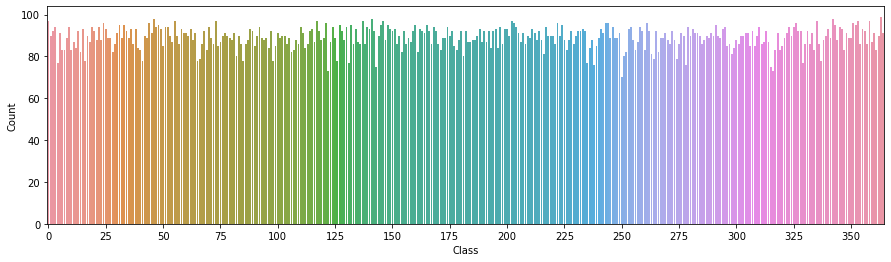

In [13]:
counts = df_all[1].value_counts()
plt.figure(figsize=(15,4))
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Class'); plt.ylabel("Count"); plt.xticks(range(0,365, 25));

In [14]:
counts.describe()

count    365.000000
mean      89.065753
std        4.961506
min       70.000000
25%       86.000000
50%       90.000000
75%       92.000000
max       99.000000
Name: 1, dtype: float64

On average there is 89 items per class with a std. of 4.96

Largest and smallest classes

In [15]:
print(counts.min(), counts.max())
min_cat, max_cat = counts.index[counts.argmin()], counts.index[counts.argmax()]
min_cat, max_cat

70 99


(250, 363)

Largest class is "youth hostel", and smallet is "orchestra pit"

In [16]:
categories.iloc[min_cat, 0], categories.iloc[max_cat, 0]

('/o/orchestra_pit', '/y/youth_hostel')